In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv("rolling_stones_spotify.csv")
# Display first 5 rows
print(df.head())

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [8]:
# Get general info
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
# Get statistical summary
print(df.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

In [ ]:
# Drop 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Double-check cleaning
print(df.dtypes)
print(df.head(2))

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object
                         name               album release_date  track_number  \
0  Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1  Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT      

Now we will do eda

In [ ]:
# Basic statistics of numerical features
df.describe()

release_date  track_number  acousticness  \
count                           1610   1610.000000   1610.000000   
mean   1992-04-23 12:57:14.534161536      8.613665      0.250475   
min              1964-04-16 00:00:00      1.000000      0.000009   
25%              1970-09-04 00:00:00      4.000000      0.058350   
50%              1986-03-24 00:00:00      7.000000      0.183000   
75%              2017-12-01 00:00:00     11.000000      0.403750   
max              2022-06-10 00:00:00     47.000000      0.994000   
std                              NaN      6.560220      0.227397   

       danceability       energy  instrumentalness    liveness     loudness  \
count   1610.000000  1610.000000       1610.000000  1610.00000  1610.000000   
mean       0.468860     0.792352          0.164170     0.49173    -6.971615   
min        0.104000     0.141000          0.000000     0.02190   -24.408000   
25%        0.362250     0.674000          0.000219     0.15300    -8.982500   
50%        0.458000     0.848500          0.013750     0.37950    -6.523000   
75%        0.578000     0.945000          0.179000     0.89375    -4.608750   
max        0.887000     0.999000          0.996000     0.99800    -1.014000   
std        0.141775     0.179886          0.276249     0.34910     2.994003   

       speechiness        tempo      valence   popularity    duration_ms  
count  1610.000000  1610.000000  1610.000000  1610.000000    1610.000000  
mean      0.069512   126.082033     0.582165    20.788199  257736.488199  
min       0.023200    46.525000     0.000000     0.000000   21000.000000  
25%       0.036500   107.390750     0.404250    13.000000  190613.000000  
50%       0.051200   124.404500     0.583000    20.000000  243093.000000  
75%       0.086600   142.355750     0.778000    27.000000  295319.750000  
max       0.624000   216.304000     0.974000    80.000000  981866.000000  
std       0.051631    29.233483     0.231253    12.426859  108333.474920

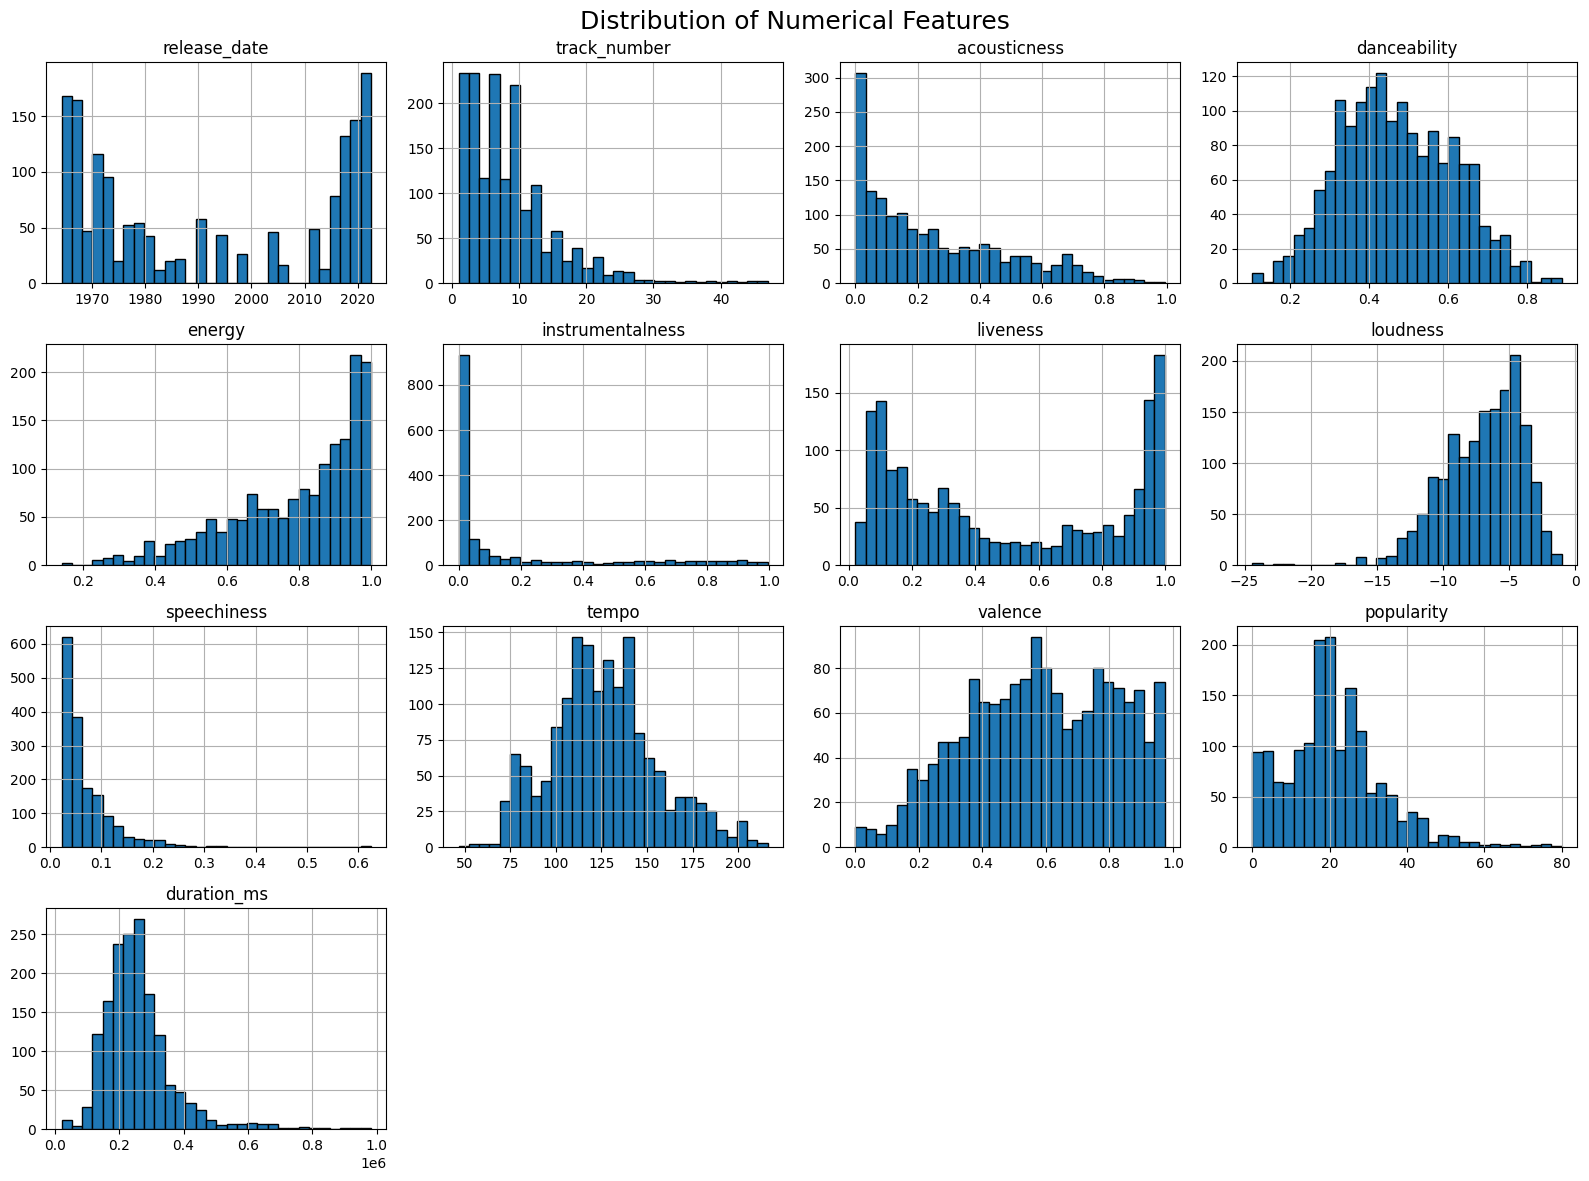

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot all numeric columns
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()


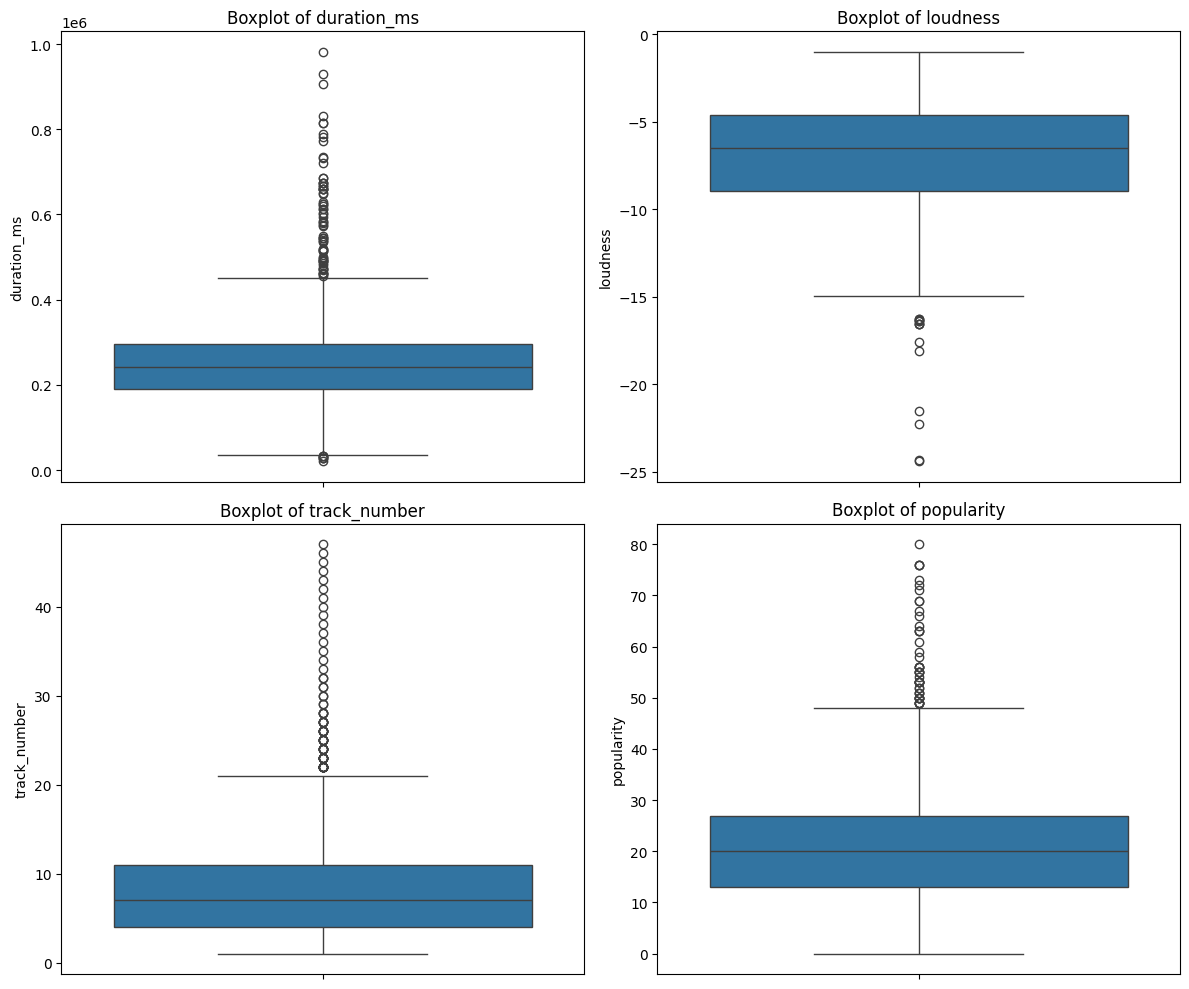

In [17]:
# Box plot to check for any outliers
selected_cols = ['duration_ms', 'loudness', 'track_number', 'popularity']

plt.figure(figsize=(12, 10))
for i, col in enumerate(selected_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [19]:
df['release_year'] = df['release_date'].dt.year



In [ ]:
# Group by year
popularity_by_year = df.groupby('release_year')['popularity'].mean().reset_index()


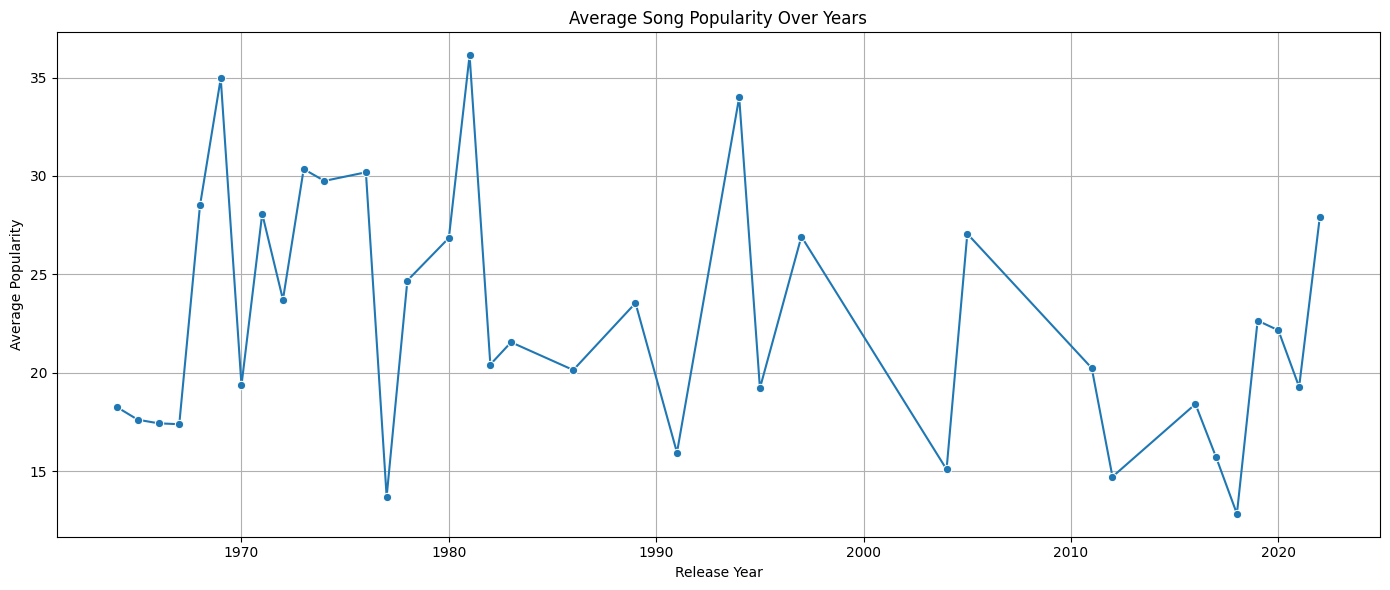

In [22]:
# Let's plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=popularity_by_year, x='release_year', y='popularity', marker='o')
plt.title('Average Song Popularity Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see major peaks around specific years suggesting those years have either a feew polular songs or manu moderately popular songs
some year have fewer songs that may give data biased as well

Now, lets see  the most popular song

In [27]:
most_popular_song = df[df['popularity'] == df['popularity'].max()]
print(most_popular_song[['name', 'popularity', 'release_date']])


                 name  popularity release_date
1403  Paint It, Black          80   1966-04-15


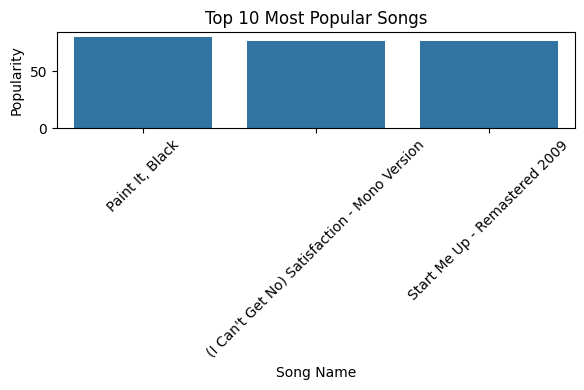

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the sorting method name and use the correct dataframe variable
top_3 = df.sort_values(by='popularity', ascending=False).head(3)

plt.figure(figsize=(6, 4))
# Use the correct dataframe variable (top_10 instead of most_popular_song)
sns.barplot(data=top_3, x='name', y='popularity')  # Fixed: most_popular_song → top_10
plt.title('Top 10 Most Popular Songs')  # More descriptive title
plt.ylabel('Popularity')
plt.xlabel('Song Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df['year'] = df['release_date'].dt.year
most_popular_by_year = df.sort_values('popularity', ascending=False).groupby('year').first().reset_index()
print(most_popular_by_year[['year', 'name', 'popularity']])


    year                                               name  popularity
0   1964                                           Route 66          51
1   1965       (I Can't Get No) Satisfaction - Mono Version          76
2   1966                                    Paint It, Black          80
3   1967                                       Ruby Tuesday          63
4   1968  Sympathy For The Devil - 50th Anniversary Edition          73
5   1969                                      Gimme Shelter          76
6   1970  Son Of A Preacher Man - Live From Madison Squa...          37
7   1971                             Wild Horses - 2009 Mix          69
8   1972                                      Tumbling Dice          63
9   1973                                              Angie          71
10  1974  It's Only Rock'n'Roll (But I Like It) - Remast...          55
11  1976                      Fool To Cry - Remastered 2009          53
12  1977          Honky Tonk Women - Live / Remastered 2009     

In [43]:
# Filter songs released after 2000
df_after_2015 = df[df['release_date'].dt.year > 2015]

# Sort by popularity and get top 15
top_15_after_2015 = df_after_2015.sort_values(by='popularity', ascending=False).head(15)

# Display relevant columns
print(top_15_after_2015[['name', 'album', 'release_date', 'popularity']])


                                                  name  \
235                                     Doom And Gloom   
240                                           Miss You   
242                                         Don't Stop   
444                                   Ride 'Em On Down   
237                                    Beast Of Burden   
234                                        Start Me Up   
156                                       Angie - 2020   
438                                     Just Your Fool   
243                                      Tumbling Dice   
375  (I Can't Get No) Satisfaction - Saturday Club ...   
445                                 Hate To See You Go   
233                             Living In A Ghost Town   
46                       Start Me Up - Remastered 2021   
254                                    Streets Of Love   
162                                            Scarlet   

                         album release_date  popularity  
235          

C:\Users\adity\AppData\Local\Temp\ipykernel_3936\532262684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_after_2015, x='popularity', y='name', palette='coolwarm')


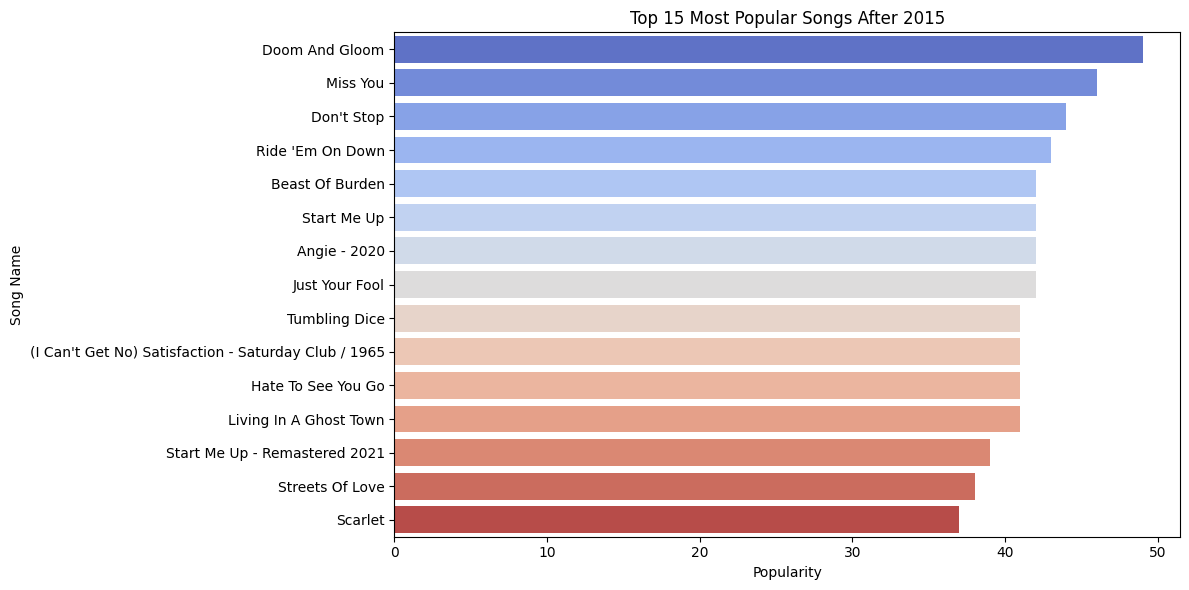

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_after_2015, x='popularity', y='name', palette='coolwarm')
plt.title('Top 15 Most Popular Songs After 2015')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()


In [45]:
df[df['name'].str.contains("Doom and Gloom", case=False)][['name', 'release_date', 'popularity']]


name release_date  popularity
235  Doom And Gloom   2019-04-19          49

Lets define popular songs based on album popularity

In [47]:
popular_songs = df[df['popularity'] > 70]
# counting the no ogf popular songs per album
album_popularity_counts = popular_songs['album'].value_counts().reset_index()
album_popularity_counts.columns = ['album', 'popular_song_count']
# sort top 3
top_albums = album_popularity_counts.head(10)


C:\Users\adity\AppData\Local\Temp\ipykernel_3936\376715831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_albums, x='popular_song_count', y='album', palette='magma')


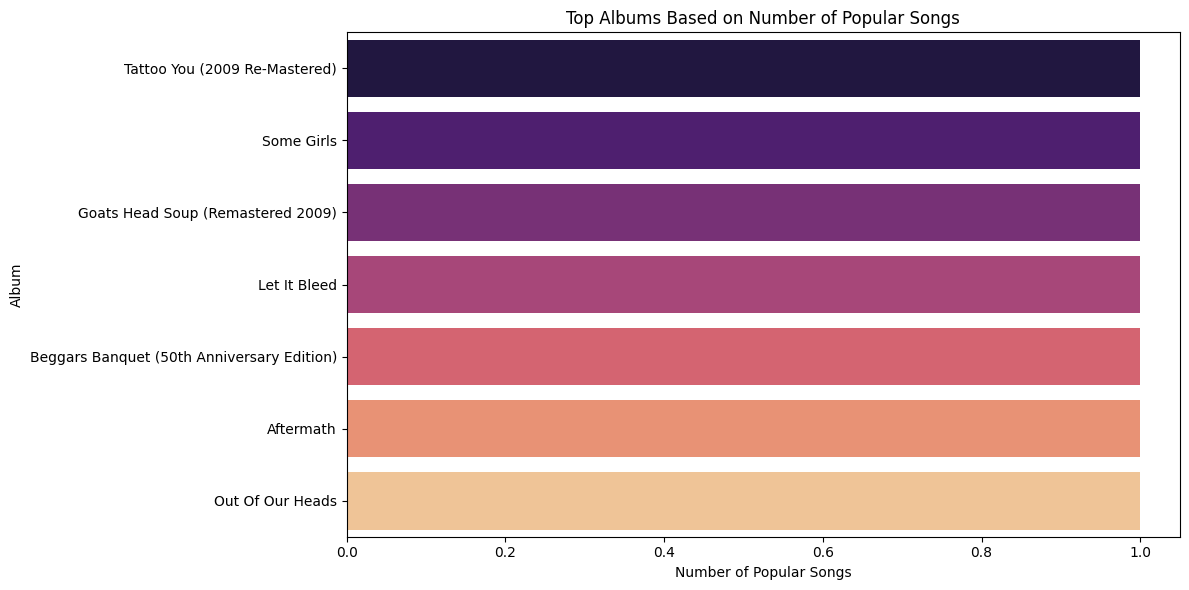

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_albums, x='popular_song_count', y='album', palette='magma')
plt.title('Top Albums Based on Number of Popular Songs')
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.tight_layout()
plt.show()


In [49]:
top_2_albums = top_albums.head(2)
print("Recommended Albums:")
print(top_2_albums)


Recommended Albums:
                           album  popular_song_count
0  Tattoo You (2009 Re-Mastered)                   1
1                     Some Girls                   1


Now we will perform Cluster Analysis

In [50]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
            'popularity', 'duration_ms']

X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


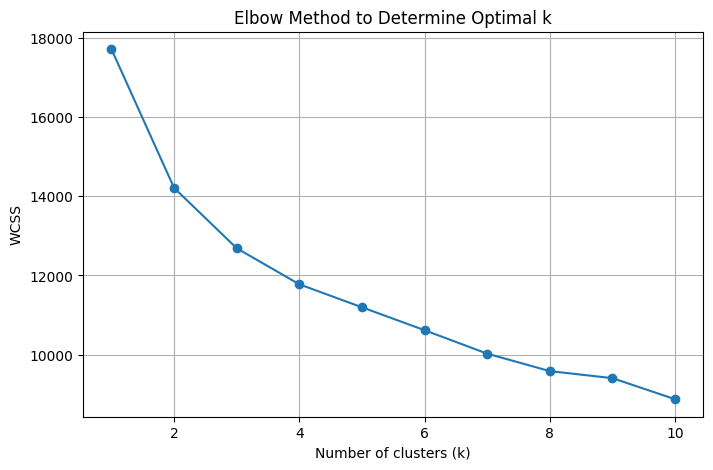

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [52]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [53]:
# Average values for each cluster
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.188823      0.360651  0.922875          0.149099  0.833054   
1            0.179612      0.554538  0.830920          0.236816  0.309783   
2            0.422791      0.499687  0.571662          0.089957  0.280298   

         loudness  speechiness       tempo   valence  popularity  \
cluster                                                            
0       -5.421080     0.106647  137.441756  0.447464   17.449573   
1       -6.396436     0.049869  122.647500  0.780882   23.762976   
2       -9.744582     0.046315  115.656356  0.501499   21.310962   

           duration_ms  
cluster                 
0        305277.851282  
1        224040.768166  
2        239088.677852  


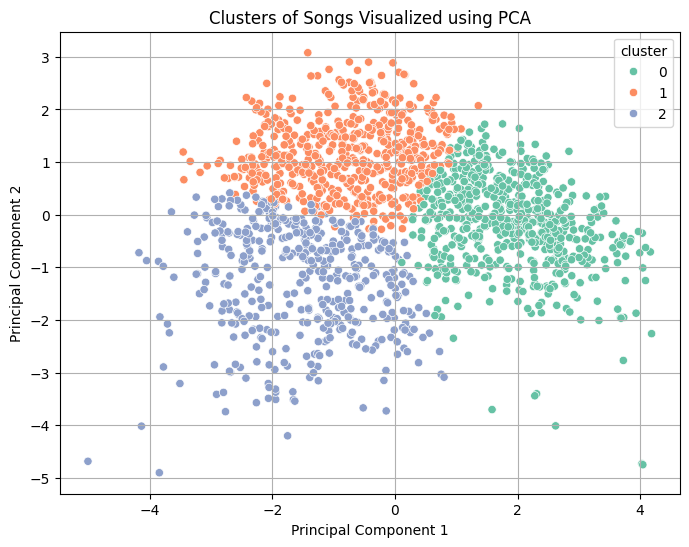

In [56]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters of Songs Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

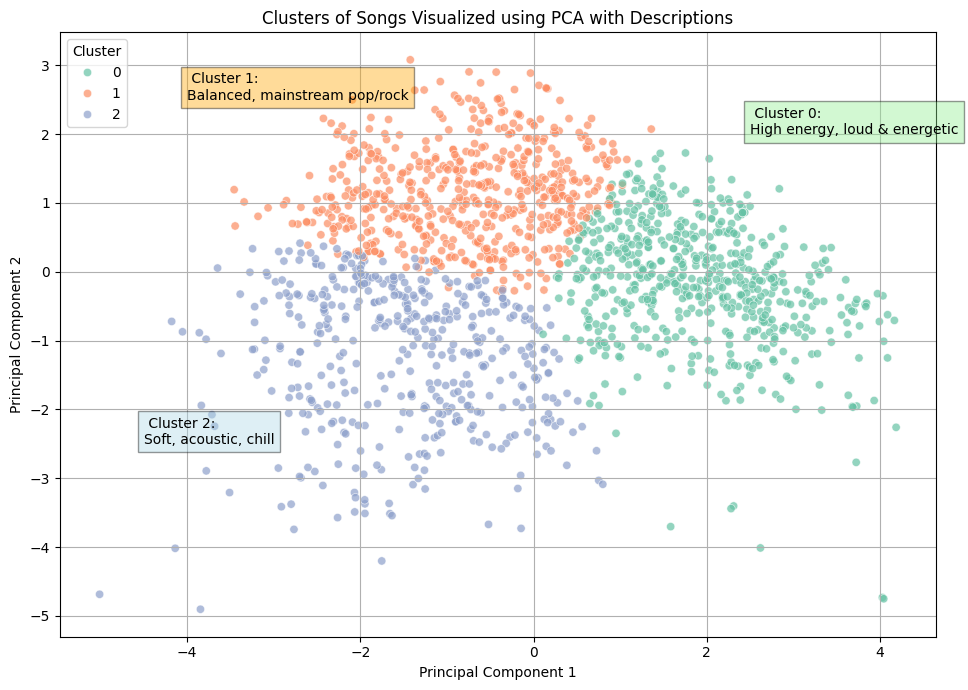

In [58]:
# With written labels sin it

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plot with cluster annotations
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', alpha=0.7)

# Add annotations for clusters — adjust x and y as per your actual cluster spread
plt.text(-4, 2.5, " Cluster 1:\nBalanced, mainstream pop/rock", fontsize=10,
         bbox=dict(facecolor='orange', alpha=0.4))

plt.text(2.5, 2, " Cluster 0:\nHigh energy, loud & energetic", fontsize=10,
         bbox=dict(facecolor='lightgreen', alpha=0.4))

plt.text(-4.5, -2.5, " Cluster 2:\nSoft, acoustic, chill", fontsize=10,
         bbox=dict(facecolor='lightblue', alpha=0.4))

# Titles and labels
plt.title('Clusters of Songs Visualized using PCA with Descriptions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
